<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-28 16:19:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-08-28 16:19:38 (66.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       h06a4308_0         131 KB  anaconda
    certifi-2022.6.15          |   py39h06a4308_0         156 KB  anaconda
    openssl-1.1.1q             |       h7f8727e_0         3.8 MB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> an

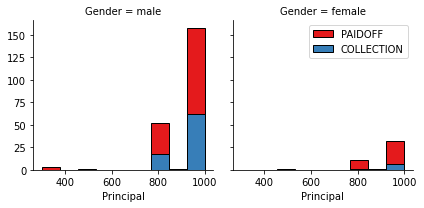

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

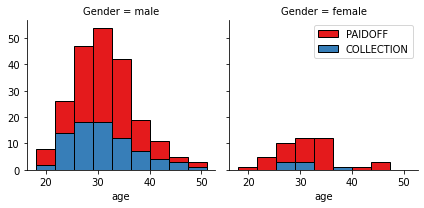

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


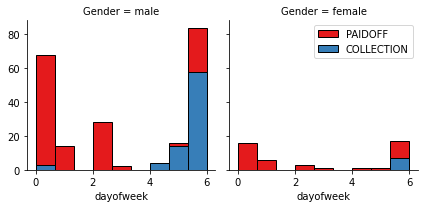

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
Featurek = df[['Principal','terms','age','Gender','weekend']]
Featurek = pd.concat([Featurek,pd.get_dummies(df['education'])], axis=1)
Featurek.drop(['Master or Above'], axis = 1,inplace=True)
Xk = Featurek.values
yk = df[['loan_status']].values.ravel()
Xk =preprocessing.StandardScaler().fit(Xk).transform(Xk.astype(float))

from sklearn.model_selection import train_test_split
X_trainK, X_testK, y_trainK, y_testK = train_test_split(Xk, yk, test_size=0.2, random_state=4)
print('train set:', X_trainK.shape, y_trainK.shape)
print('test set:', X_testK.shape, y_testK.shape)

train set: (276, 8) (276,)
test set: (70, 8) (70,)


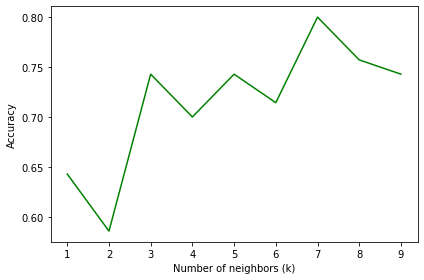

Best accuracy 0.8 with K =  6


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_trainK, y_trainK)
    yhatK=neigh.predict(X_testK)
    mean_acc[n-1]=metrics.accuracy_score(y_testK, yhatK)
    std_acc[n-1]=np.std(yhatK==y_testK)/np.sqrt(yhatK.shape[0])
mean_acc

plt.plot(range(1,Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout()
plt.show()

print('Best accuracy', mean_acc.max(), 'with K = ', mean_acc.argmax())

In [22]:
K=6
neigh=KNeighborsClassifier(n_neighbors=K).fit(X_trainK, y_trainK)
yhatK=neigh.predict(X_testK)
print("train set accurary:", metrics.accuracy_score(y_trainK, neigh.predict(X_trainK)))
print("test train accuracy:", metrics.accuracy_score(y_testK, yhatK))

train set accurary: 0.7971014492753623
test train accuracy: 0.7142857142857143


# Decision Tree


In [23]:
import sys
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

Featuretree = df[['Principal','terms','age','Gender','weekend']]
Featuretree = pd.concat([Featuretree,pd.get_dummies(df['education'])], axis=1)
Featuretree.drop(['Master or Above'], axis = 1,inplace=True)
Xtree = Featuretree.values
ytree = df[['loan_status']].values
Xtree =preprocessing.StandardScaler().fit(Xtree).transform(Xtree.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtree, ytree, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (276, 8) (276, 1)
test set: (70, 8) (70, 1)


In [24]:
loantree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
loantree
loantree.fit(X_train, y_train)
predloantree = loantree.predict(X_test)
print('Tree accuracy', metrics.accuracy_score(y_test, predloantree))

Tree accuracy 0.6142857142857143


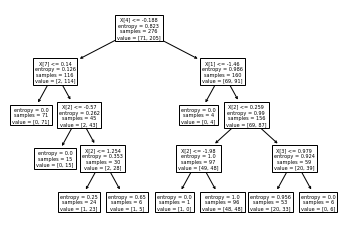

In [25]:
tree.plot_tree(loantree)
plt.show()

# Support Vector Machine


In [26]:
Featuresvm = df[['Principal','terms','age','Gender','weekend']]
Featuresvm = pd.concat([Featuresvm,pd.get_dummies(df['education'])], axis=1)
Featuresvm.drop(['Master or Above'], axis = 1,inplace=True)
Xsvm = Featuresvm.values
ysvm = df[['loan_status']].values.ravel()
Xsvm =preprocessing.StandardScaler().fit(Xsvm).transform(Xsvm.astype(float))

X_train, X_test, y_train, y_test = train_test_split(Xsvm, ysvm, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (276, 8) (276,)
test set: (70, 8) (70,)


In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



Text(0.5, 1.0, 'Confusion Matrix')

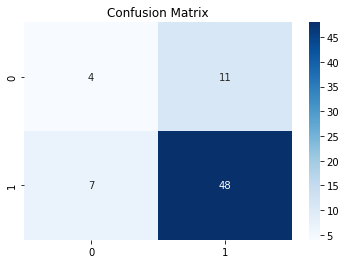

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
cnf_matrix=confusion_matrix(y_test, yhat)
np.set_printoptions(precision = 2)
print(classification_report(y_test, yhat))
ax = sns.heatmap(cnf_matrix, annot=True, cmap="Blues")
ax.set_title('Confusion Matrix')

# Logistic Regression


In [46]:
FeatureLR = df[['Principal','terms','age','Gender','weekend']]
FeatureLR = pd.concat([FeatureLR,pd.get_dummies(df['education'])], axis=1)
FeatureLR.drop(['Master or Above'], axis = 1,inplace=True)
XLR = np.asarray(FeatureLR)
yLR = np.asarray(df['loan_status'])
XLR =preprocessing.StandardScaler().fit(XLR).transform(XLR.astype(float))

X_train, X_test, y_train, y_test = train_test_split(XLR, yLR, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)
FeatureLR

train set: (276, 8) (276,)
test set: (70, 8) (70,)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [47]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat=LR.predict(X_test)
yhat_prob=LR.predict_proba(X_test)

array([[ 0.52,  0.92, -0.16, -0.42,  0.83, -0.38,  1.14, -0.87],
       [-1.31, -0.96, -0.16, -0.42,  0.83, -0.38, -0.88,  1.15],
       [ 0.52, -0.96,  0.01, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92, -1.15, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92,  0.51, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.84, -0.42,  0.83, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  1.5 , -0.42,  0.83, -0.38,  1.14, -0.87],
       [ 0.52,  0.92, -1.15, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52, -0.96, -1.81, -0.42,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.82, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.16, -0.42,  0.83, -0.38, -0.88,  1.15],
       [-4.06, -0.96, -1.32,  2.38, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.65, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52, -0.96,  2.33, -0.42,  0.83, -0.38,  1.14, -0.87],
       [ 0.52, -1.96, -0.

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.08333333333333333

# Model Evaluation using Test set


In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [33]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-28 16:21:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-28 16:21:18 (29.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [49]:
test_df = pd.read_csv('loan_test.csv')
#preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [53]:
#KNN Jaccard and F1score
K=6
neigh=KNeighborsClassifier(n_neighbors=K).fit(X_trainK, y_trainK)
#processing test data
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
Featuretestk = test_df[['Principal','terms','age','Gender','weekend']]
Featuretestk = pd.concat([Featuretestk,pd.get_dummies(test_df['education'])], axis=1)
Featuretestk.drop(['Master or Above'], axis = 1,inplace=True)
Xtestk = Featuretestk.values
ytestk = test_df[['loan_status']].values.ravel()
Xtestk =preprocessing.StandardScaler().fit(Xtestk).transform(Xtestk.astype(float))
#checking metrics
yhatK=neigh.predict(Xtestk)
JaccKNN = jaccard_score(ytestk, yhatK, pos_label=0)
print('Jaccard score for KNN:', JaccKNN)
F1KNN = f1_score(ytestk, yhatK, average='weighted')
print('F1 score for KNN:', F1KNN)

Jaccard score for KNN: 0.2608695652173913
F1 score for KNN: 0.6886205279919816


In [51]:
#Decision Tree Jaccard and F1score
predloantree = loantree.predict(Xtestk)
Jacctree = jaccard_score(ytestk, predloantree, pos_label=0)
print('Jaccard score for Decision Tree:', Jacctree)
F1tree = f1_score(ytestk, predloantree, average='weighted')
print('F1 score for Decision Tree:', F1tree)

#SVM Jaccard and F1score
yhatsvm=clf.predict(Xtestk)
Jaccsvm = jaccard_score(ytestk, yhatsvm, pos_label=0)
print('Jaccard score for SVM:', Jaccsvm)
F1svm = f1_score(ytestk, yhatsvm, pos_label=0)
print('F1 score for SVM:', F1svm)

Jaccard score for Decision Tree: 0.4
F1 score for Decision Tree: 0.7366818873668188
Jaccard score for SVM: 0.26666666666666666
F1 score for SVM: 0.4210526315789473


In [56]:
#Logistic Jaccard, F1-score, and LogLoss
yhatLR=LR.predict(Xtestk)
yhatLR_prob=LR.predict_proba(Xtestk)
JaccLR = jaccard_score(ytestk, yhatLR, pos_label=0)
print('Jaccard score for Logistic Regression:', JaccLR)
F1LR = f1_score(ytestk, yhatLR, pos_label=0)
print('F1 score for Logistic Regression:', F1LR)
log_lossLR = log_loss(ytestk, yhatLR_prob)
print('log loss for Logistic Regression', log_lossLR)

!pip install tabulate
from tabulate import tabulate
table = [['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], ['KNN', JaccKNN, F1KNN, 'NA'], ['Decision Tree', Jacctree, F1tree, 'NA'], ['SVM', Jaccsvm, F1svm, 'NA'], ['Logistic Regression', JaccLR, F1LR, log_lossLR]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Jaccard score for Logistic Regression: 0.06666666666666667
F1 score for Logistic Regression: 0.125
log loss for Logistic Regression 0.5672153379912981
╒═════════════════════╤═══════════╤════════════╤════════════════════╕
│ Algorithm           │   Jaccard │   F1-score │ LogLoss            │
╞═════════════════════╪═══════════╪════════════╪════════════════════╡
│ KNN                 │ 0.26087   │   0.688621 │ NA                 │
├─────────────────────┼───────────┼────────────┼────────────────────┤
│ Decision Tree       │ 0.4       │   0.736682 │ NA                 │
├─────────────────────┼───────────┼────────────┼────────────────────┤
│ SVM                 │ 0.266667  │   0.421053 │ NA                 │
├─────────────────────┼───────────┼────────────┼────────────────────┤
│ Logistic Regression │ 0.0666667 │   0.125    │ 0.5672153379912981 │
╘═════════════════════╧═══════════╧════════════╧════════════════════╛


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
